In [194]:
# Programa para testear el procesamiento de imágenes con Opencv2

In [195]:
import cv2
import imutils
import os
import numpy as np
import matplotlib.pyplot as plt

In [196]:
def hand_cropping(file_path):
    img = cv2.imread(file_path)
    hsvim = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 48, 80], dtype="uint8")
    upper = np.array([20, 255, 255], dtype="uint8")
    skinMask= cv2.inRange(hsvim, lower, upper)
    ret, thresh = cv2.threshold(skinMask, 100, 255, cv2.THRESH_BINARY)

    # Detectamos los contornos
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 5:
        contours = max(contours, key=lambda x: cv2.contourArea(x))
        box = cv2.boundingRect(contours)
        x, y, w, h = box

        # Recortamos la imagen como un cuadrado
        if w > h:
            y = y - int((w-h)/2)
            if y < 0:
                y = 0
            h = w
        else:
            x = x - int((h-w)/2)
            if x < 0:
                x = 0
            w = h
        crop_img = img[y:y+h, x:x+w]
        return crop_img
    else:
        return img


In [197]:
def image_processing(hand_img):
    # 1. Convertir a escala de grises
    img_gray = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)
    # 2. Aplicar un filtro de suavizado
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    # # 3. Enfocamos en la piel
    # img_gray = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    # # 4. Invertimos los colores
    # img_gray = cv2.bitwise_not(img_gray)
    # 5. Escalar la imagen a 100x100
    img_gray = cv2.resize(img_gray, (100, 100))
    # plt.imshow(img_gray, cmap='gray')
    return img_gray


In [198]:
def image_as_array(label, img):
    # Convertimos la imagen a un array
    img_array = np.array(img)
    img_array = np.append(label, img_array)
    return img_array

def 

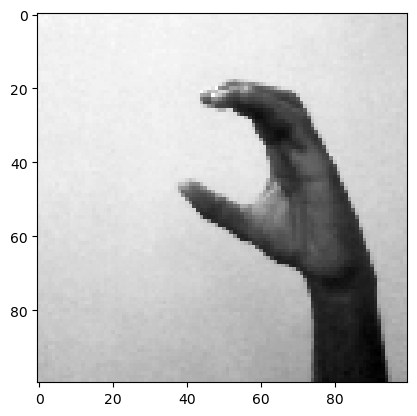

In [199]:
# img = hand_cropping('dataset/test/nothing/3001.jpg')
img = cv2.imread('dataset/test/c/3001.jpg')
img = image_processing(img)
plt.imshow(img, cmap='gray')

In [200]:
img = image_as_array('A', img)
print (img)

['A' '172' '169' ... '121' '124' '124']
